In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: PCAR
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


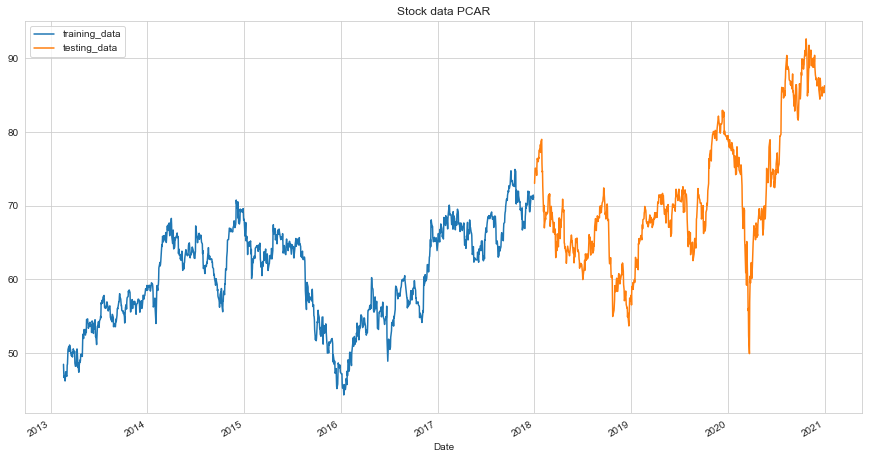

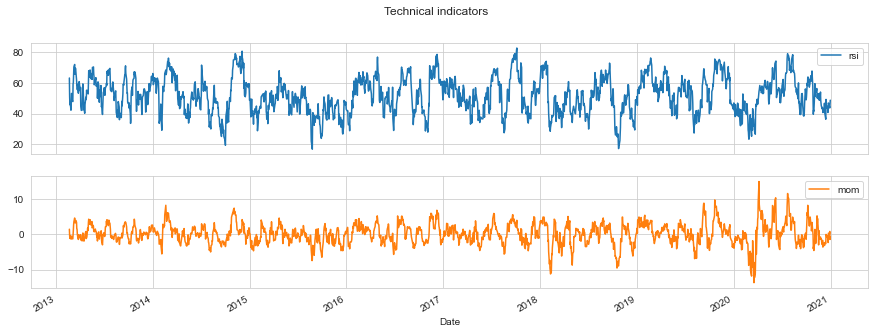

In [2]:
stock_name = 'pcar'.upper()
industry = 'Industrial'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1260.01, duration: 0:00:00.397720
episode: 2/2000, episode end value: 1174.92, duration: 0:00:00.367117
episode: 3/2000, episode end value: 1299.34, duration: 0:00:00.415335
episode: 4/2000, episode end value: 1294.85, duration: 0:00:00.443040
episode: 5/2000, episode end value: 1301.25, duration: 0:00:00.480608
episode: 6/2000, episode end value: 1280.82, duration: 0:00:00.622523
episode: 7/2000, episode end value: 1281.55, duration: 0:00:00.530118
episode: 8/2000, episode end value: 1290.31, duration: 0:00:00.427126
episode: 9/2000, episode end value: 1267.73, duration: 0:00:00.530327
episode: 10/2000, episode end value: 1281.16, duration: 0:00:00.505707
episode: 11/2000, episode end value: 1281.35, duration: 0:00:00.489886
episode: 12/2000, episode end value: 1281.36, duration: 0:00:00.478542
episode: 13/2000, episode end value: 1281.21, duration: 0:00:00.492589
episode: 14/2000, episode end value: 1281.41, duration: 0:00:00.545548
episode: 15/200

episode: 117/2000, episode end value: 1264.76, duration: 0:00:00.400473
episode: 118/2000, episode end value: 1285.54, duration: 0:00:00.467440
episode: 119/2000, episode end value: 1262.08, duration: 0:00:00.458992
episode: 120/2000, episode end value: 1275.35, duration: 0:00:00.425102
episode: 121/2000, episode end value: 1265.67, duration: 0:00:00.516381
episode: 122/2000, episode end value: 1270.86, duration: 0:00:00.446915
episode: 123/2000, episode end value: 1271.57, duration: 0:00:00.553020
episode: 124/2000, episode end value: 1268.49, duration: 0:00:00.452175
episode: 125/2000, episode end value: 1267.61, duration: 0:00:00.412249
episode: 126/2000, episode end value: 1272.64, duration: 0:00:00.465289
episode: 127/2000, episode end value: 1285.63, duration: 0:00:00.432422
episode: 128/2000, episode end value: 1280.72, duration: 0:00:00.399262
episode: 129/2000, episode end value: 1270.83, duration: 0:00:00.482475
episode: 130/2000, episode end value: 1269.97, duration: 0:00:00

episode: 231/2000, episode end value: 1264.55, duration: 0:00:00.479570
episode: 232/2000, episode end value: 1277.49, duration: 0:00:00.510042
episode: 233/2000, episode end value: 1273.32, duration: 0:00:00.375203
episode: 234/2000, episode end value: 1263.84, duration: 0:00:00.402839
episode: 235/2000, episode end value: 1258.34, duration: 0:00:00.399471
episode: 236/2000, episode end value: 1272.46, duration: 0:00:00.430297
episode: 237/2000, episode end value: 1302.24, duration: 0:00:00.444944
episode: 238/2000, episode end value: 1287.39, duration: 0:00:00.552127
episode: 239/2000, episode end value: 1302.50, duration: 0:00:00.540165
episode: 240/2000, episode end value: 1267.19, duration: 0:00:00.485222
episode: 241/2000, episode end value: 1280.01, duration: 0:00:00.524760
episode: 242/2000, episode end value: 1272.75, duration: 0:00:00.510078
episode: 243/2000, episode end value: 1266.45, duration: 0:00:00.445235
episode: 244/2000, episode end value: 1281.10, duration: 0:00:00

episode: 345/2000, episode end value: 1278.80, duration: 0:00:00.467372
episode: 346/2000, episode end value: 1276.31, duration: 0:00:00.497391
episode: 347/2000, episode end value: 1262.97, duration: 0:00:00.467668
episode: 348/2000, episode end value: 1266.25, duration: 0:00:00.423409
episode: 349/2000, episode end value: 1261.13, duration: 0:00:00.454689
episode: 350/2000, episode end value: 1258.95, duration: 0:00:00.480603
episode: 351/2000, episode end value: 1242.33, duration: 0:00:00.403509
episode: 352/2000, episode end value: 1250.95, duration: 0:00:00.431751
episode: 353/2000, episode end value: 1235.17, duration: 0:00:00.377735
episode: 354/2000, episode end value: 1234.74, duration: 0:00:00.392134
episode: 355/2000, episode end value: 1255.97, duration: 0:00:00.404741
episode: 356/2000, episode end value: 1227.42, duration: 0:00:00.389677
episode: 357/2000, episode end value: 1267.58, duration: 0:00:00.453724
episode: 358/2000, episode end value: 1219.75, duration: 0:00:00

episode: 459/2000, episode end value: 1273.52, duration: 0:00:00.444470
episode: 460/2000, episode end value: 1280.08, duration: 0:00:00.443099
episode: 461/2000, episode end value: 1268.27, duration: 0:00:00.393958
episode: 462/2000, episode end value: 1267.48, duration: 0:00:00.468973
episode: 463/2000, episode end value: 1268.15, duration: 0:00:00.504506
episode: 464/2000, episode end value: 1285.55, duration: 0:00:00.502145
episode: 465/2000, episode end value: 1262.69, duration: 0:00:00.446540
episode: 466/2000, episode end value: 1271.71, duration: 0:00:00.398461
episode: 467/2000, episode end value: 1277.96, duration: 0:00:00.447187
episode: 468/2000, episode end value: 1265.80, duration: 0:00:00.489019
episode: 469/2000, episode end value: 1278.04, duration: 0:00:00.495720
episode: 470/2000, episode end value: 1258.66, duration: 0:00:00.502112
episode: 471/2000, episode end value: 1254.57, duration: 0:00:00.474054
episode: 472/2000, episode end value: 1289.54, duration: 0:00:00

episode: 573/2000, episode end value: 1275.08, duration: 0:00:00.427123
episode: 574/2000, episode end value: 1259.22, duration: 0:00:00.446855
episode: 575/2000, episode end value: 1257.41, duration: 0:00:00.587597
episode: 576/2000, episode end value: 1271.93, duration: 0:00:00.482676
episode: 577/2000, episode end value: 1273.57, duration: 0:00:00.542464
episode: 578/2000, episode end value: 1255.99, duration: 0:00:00.405153
episode: 579/2000, episode end value: 1251.88, duration: 0:00:00.400957
episode: 580/2000, episode end value: 1260.69, duration: 0:00:00.560074
episode: 581/2000, episode end value: 1259.97, duration: 0:00:00.575659
episode: 582/2000, episode end value: 1262.62, duration: 0:00:00.514261
episode: 583/2000, episode end value: 1282.54, duration: 0:00:00.488265
episode: 584/2000, episode end value: 1252.93, duration: 0:00:00.517450
episode: 585/2000, episode end value: 1265.61, duration: 0:00:00.521260
episode: 586/2000, episode end value: 1259.44, duration: 0:00:00

episode: 687/2000, episode end value: 1261.29, duration: 0:00:00.426093
episode: 688/2000, episode end value: 1273.48, duration: 0:00:00.508210
episode: 689/2000, episode end value: 1278.69, duration: 0:00:00.479637
episode: 690/2000, episode end value: 1271.88, duration: 0:00:00.552642
episode: 691/2000, episode end value: 1258.50, duration: 0:00:00.509320
episode: 692/2000, episode end value: 1280.56, duration: 0:00:00.517657
episode: 693/2000, episode end value: 1326.92, duration: 0:00:00.444551
episode: 694/2000, episode end value: 1279.54, duration: 0:00:00.414984
episode: 695/2000, episode end value: 1266.35, duration: 0:00:00.480090
episode: 696/2000, episode end value: 1280.96, duration: 0:00:00.534825
episode: 697/2000, episode end value: 1263.72, duration: 0:00:00.375136
episode: 698/2000, episode end value: 1319.78, duration: 0:00:00.457097
episode: 699/2000, episode end value: 1248.43, duration: 0:00:00.381495
episode: 700/2000, episode end value: 1253.11, duration: 0:00:00

episode: 801/2000, episode end value: 1279.03, duration: 0:00:00.522471
episode: 802/2000, episode end value: 1289.51, duration: 0:00:00.461588
episode: 803/2000, episode end value: 1264.85, duration: 0:00:00.505922
episode: 804/2000, episode end value: 1267.84, duration: 0:00:00.445362
episode: 805/2000, episode end value: 1278.77, duration: 0:00:00.443860
episode: 806/2000, episode end value: 1287.91, duration: 0:00:00.522858
episode: 807/2000, episode end value: 1290.81, duration: 0:00:00.344205
episode: 808/2000, episode end value: 1287.86, duration: 0:00:00.468170
episode: 809/2000, episode end value: 1259.23, duration: 0:00:00.397048
episode: 810/2000, episode end value: 1292.11, duration: 0:00:00.537267
episode: 811/2000, episode end value: 1267.32, duration: 0:00:00.486143
episode: 812/2000, episode end value: 1279.76, duration: 0:00:00.514835
episode: 813/2000, episode end value: 1277.84, duration: 0:00:00.496553
episode: 814/2000, episode end value: 1280.10, duration: 0:00:00

episode: 915/2000, episode end value: 1354.03, duration: 0:00:00.300960
episode: 916/2000, episode end value: 1262.18, duration: 0:00:00.301982
episode: 917/2000, episode end value: 1272.58, duration: 0:00:00.427362
episode: 918/2000, episode end value: 1307.08, duration: 0:00:00.414317
episode: 919/2000, episode end value: 1250.00, duration: 0:00:00.400817
episode: 920/2000, episode end value: 1276.46, duration: 0:00:00.515449
episode: 921/2000, episode end value: 1256.29, duration: 0:00:00.481887
episode: 922/2000, episode end value: 1270.14, duration: 0:00:00.551290
episode: 923/2000, episode end value: 1272.25, duration: 0:00:00.487968
episode: 924/2000, episode end value: 1260.79, duration: 0:00:00.503289
episode: 925/2000, episode end value: 1249.41, duration: 0:00:00.409119
episode: 926/2000, episode end value: 1292.04, duration: 0:00:00.422378
episode: 927/2000, episode end value: 1303.34, duration: 0:00:00.409373
episode: 928/2000, episode end value: 1267.33, duration: 0:00:00

episode: 1029/2000, episode end value: 1270.37, duration: 0:00:00.526341
episode: 1030/2000, episode end value: 1265.00, duration: 0:00:00.454293
episode: 1031/2000, episode end value: 1280.25, duration: 0:00:00.555012
episode: 1032/2000, episode end value: 1279.60, duration: 0:00:00.464477
episode: 1033/2000, episode end value: 1265.58, duration: 0:00:00.455792
episode: 1034/2000, episode end value: 1285.85, duration: 0:00:00.488007
episode: 1035/2000, episode end value: 1266.73, duration: 0:00:00.502265
episode: 1036/2000, episode end value: 1271.74, duration: 0:00:00.510936
episode: 1037/2000, episode end value: 1270.81, duration: 0:00:00.565321
episode: 1038/2000, episode end value: 1257.43, duration: 0:00:00.500297
episode: 1039/2000, episode end value: 1275.43, duration: 0:00:00.464736
episode: 1040/2000, episode end value: 1280.08, duration: 0:00:00.400329
episode: 1041/2000, episode end value: 1285.36, duration: 0:00:00.402667
episode: 1042/2000, episode end value: 1270.62, dur

episode: 1142/2000, episode end value: 1242.82, duration: 0:00:00.359504
episode: 1143/2000, episode end value: 1231.16, duration: 0:00:00.391623
episode: 1144/2000, episode end value: 1221.67, duration: 0:00:00.370514
episode: 1145/2000, episode end value: 1273.18, duration: 0:00:00.356577
episode: 1146/2000, episode end value: 1257.81, duration: 0:00:00.335193
episode: 1147/2000, episode end value: 1217.98, duration: 0:00:00.373698
episode: 1148/2000, episode end value: 1196.76, duration: 0:00:00.246112
episode: 1149/2000, episode end value: 1275.30, duration: 0:00:00.237354
episode: 1150/2000, episode end value: 1273.96, duration: 0:00:00.318352
episode: 1151/2000, episode end value: 1215.11, duration: 0:00:00.385100
episode: 1152/2000, episode end value: 1224.32, duration: 0:00:00.329448
episode: 1153/2000, episode end value: 1248.55, duration: 0:00:00.316873
episode: 1154/2000, episode end value: 1309.67, duration: 0:00:00.330840
episode: 1155/2000, episode end value: 1250.11, dur

episode: 1255/2000, episode end value: 1266.18, duration: 0:00:00.465201
episode: 1256/2000, episode end value: 1280.49, duration: 0:00:00.542881
episode: 1257/2000, episode end value: 1307.78, duration: 0:00:00.406854
episode: 1258/2000, episode end value: 1262.38, duration: 0:00:00.464023
episode: 1259/2000, episode end value: 1269.91, duration: 0:00:00.416790
episode: 1260/2000, episode end value: 1279.80, duration: 0:00:00.459634
episode: 1261/2000, episode end value: 1293.63, duration: 0:00:00.552422
episode: 1262/2000, episode end value: 1282.52, duration: 0:00:00.454445
episode: 1263/2000, episode end value: 1266.20, duration: 0:00:00.416488
episode: 1264/2000, episode end value: 1314.35, duration: 0:00:00.437429
episode: 1265/2000, episode end value: 1272.58, duration: 0:00:00.452778
episode: 1266/2000, episode end value: 1271.98, duration: 0:00:00.403728
episode: 1267/2000, episode end value: 1295.77, duration: 0:00:00.409585
episode: 1268/2000, episode end value: 1268.23, dur

episode: 1368/2000, episode end value: 1271.89, duration: 0:00:00.424211
episode: 1369/2000, episode end value: 1272.24, duration: 0:00:00.441823
episode: 1370/2000, episode end value: 1270.83, duration: 0:00:00.434418
episode: 1371/2000, episode end value: 1270.68, duration: 0:00:00.486585
episode: 1372/2000, episode end value: 1273.40, duration: 0:00:00.482458
episode: 1373/2000, episode end value: 1277.04, duration: 0:00:00.365188
episode: 1374/2000, episode end value: 1272.48, duration: 0:00:00.396956
episode: 1375/2000, episode end value: 1307.62, duration: 0:00:00.349147
episode: 1376/2000, episode end value: 1278.67, duration: 0:00:00.424655
episode: 1377/2000, episode end value: 1279.45, duration: 0:00:00.489141
episode: 1378/2000, episode end value: 1267.76, duration: 0:00:00.362793
episode: 1379/2000, episode end value: 1278.53, duration: 0:00:00.432667
episode: 1380/2000, episode end value: 1269.48, duration: 0:00:00.389962
episode: 1381/2000, episode end value: 1292.50, dur

episode: 1481/2000, episode end value: 1298.20, duration: 0:00:00.384429
episode: 1482/2000, episode end value: 1265.77, duration: 0:00:00.333768
episode: 1483/2000, episode end value: 1274.61, duration: 0:00:00.352856
episode: 1484/2000, episode end value: 1278.57, duration: 0:00:00.369226
episode: 1485/2000, episode end value: 1286.37, duration: 0:00:00.374963
episode: 1486/2000, episode end value: 1266.57, duration: 0:00:00.375301
episode: 1487/2000, episode end value: 1280.88, duration: 0:00:00.437626
episode: 1488/2000, episode end value: 1278.80, duration: 0:00:00.352477
episode: 1489/2000, episode end value: 1287.12, duration: 0:00:00.376233
episode: 1490/2000, episode end value: 1267.76, duration: 0:00:00.316606
episode: 1491/2000, episode end value: 1276.57, duration: 0:00:00.343092
episode: 1492/2000, episode end value: 1267.55, duration: 0:00:00.336982
episode: 1493/2000, episode end value: 1276.67, duration: 0:00:00.436786
episode: 1494/2000, episode end value: 1255.62, dur

episode: 1594/2000, episode end value: 1268.05, duration: 0:00:00.333399
episode: 1595/2000, episode end value: 1277.46, duration: 0:00:00.334745
episode: 1596/2000, episode end value: 1297.44, duration: 0:00:00.290284
episode: 1597/2000, episode end value: 1256.73, duration: 0:00:00.295817
episode: 1598/2000, episode end value: 1268.70, duration: 0:00:00.313298
episode: 1599/2000, episode end value: 1290.99, duration: 0:00:00.303697
episode: 1600/2000, episode end value: 1292.02, duration: 0:00:00.292517
episode: 1601/2000, episode end value: 1275.76, duration: 0:00:00.286547
episode: 1602/2000, episode end value: 1280.92, duration: 0:00:00.328393
episode: 1603/2000, episode end value: 1262.37, duration: 0:00:00.274755
episode: 1604/2000, episode end value: 1266.65, duration: 0:00:00.307022
episode: 1605/2000, episode end value: 1279.26, duration: 0:00:00.315827
episode: 1606/2000, episode end value: 1290.87, duration: 0:00:00.313920
episode: 1607/2000, episode end value: 1279.13, dur

episode: 1707/2000, episode end value: 1260.57, duration: 0:00:00.277022
episode: 1708/2000, episode end value: 1276.98, duration: 0:00:00.300378
episode: 1709/2000, episode end value: 1267.50, duration: 0:00:00.285253
episode: 1710/2000, episode end value: 1277.58, duration: 0:00:00.255971
episode: 1711/2000, episode end value: 1286.93, duration: 0:00:00.316285
episode: 1712/2000, episode end value: 1292.30, duration: 0:00:00.261510
episode: 1713/2000, episode end value: 1281.80, duration: 0:00:00.299314
episode: 1714/2000, episode end value: 1277.53, duration: 0:00:00.263604
episode: 1715/2000, episode end value: 1283.93, duration: 0:00:00.269230
episode: 1716/2000, episode end value: 1280.86, duration: 0:00:00.234171
episode: 1717/2000, episode end value: 1265.93, duration: 0:00:00.271042
episode: 1718/2000, episode end value: 1261.18, duration: 0:00:00.276395
episode: 1719/2000, episode end value: 1271.23, duration: 0:00:00.282837
episode: 1720/2000, episode end value: 1280.36, dur

episode: 1820/2000, episode end value: 1304.45, duration: 0:00:00.268068
episode: 1821/2000, episode end value: 1296.98, duration: 0:00:00.244820
episode: 1822/2000, episode end value: 1308.94, duration: 0:00:00.212676
episode: 1823/2000, episode end value: 1205.31, duration: 0:00:00.224562
episode: 1824/2000, episode end value: 1266.16, duration: 0:00:00.296613
episode: 1825/2000, episode end value: 1254.86, duration: 0:00:00.242673
episode: 1826/2000, episode end value: 1269.00, duration: 0:00:00.272343
episode: 1827/2000, episode end value: 1280.81, duration: 0:00:00.232358
episode: 1828/2000, episode end value: 1266.44, duration: 0:00:00.258641
episode: 1829/2000, episode end value: 1270.36, duration: 0:00:00.277514
episode: 1830/2000, episode end value: 1278.64, duration: 0:00:00.281212
episode: 1831/2000, episode end value: 1268.77, duration: 0:00:00.248076
episode: 1832/2000, episode end value: 1301.43, duration: 0:00:00.248414
episode: 1833/2000, episode end value: 1310.74, dur

episode: 1933/2000, episode end value: 1278.92, duration: 0:00:00.214322
episode: 1934/2000, episode end value: 1260.16, duration: 0:00:00.204280
episode: 1935/2000, episode end value: 1314.06, duration: 0:00:00.222327
episode: 1936/2000, episode end value: 1264.91, duration: 0:00:00.192914
episode: 1937/2000, episode end value: 1269.28, duration: 0:00:00.228928
episode: 1938/2000, episode end value: 1271.74, duration: 0:00:00.238110
episode: 1939/2000, episode end value: 1270.20, duration: 0:00:00.234563
episode: 1940/2000, episode end value: 1274.48, duration: 0:00:00.233598
episode: 1941/2000, episode end value: 1264.74, duration: 0:00:00.247830
episode: 1942/2000, episode end value: 1278.13, duration: 0:00:00.225712
episode: 1943/2000, episode end value: 1255.57, duration: 0:00:00.205398
episode: 1944/2000, episode end value: 1245.68, duration: 0:00:00.241098
episode: 1945/2000, episode end value: 1273.27, duration: 0:00:00.226703
episode: 1946/2000, episode end value: 1255.98, dur

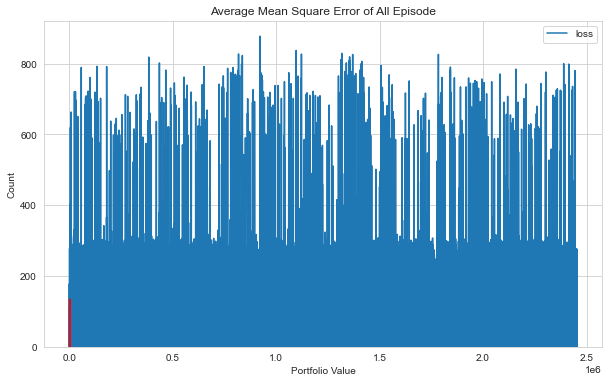

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

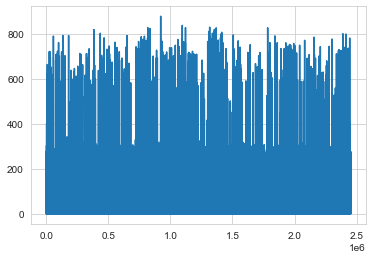

In [5]:
plt.plot(agent.model.losses)

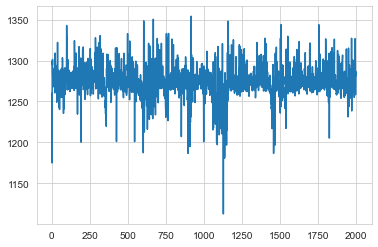

In [6]:
plt.plot(portfolio_value)

episode end value: 1166.66, duration: 0:00:00.096168
Sell: 401 times, Buy: 349 times


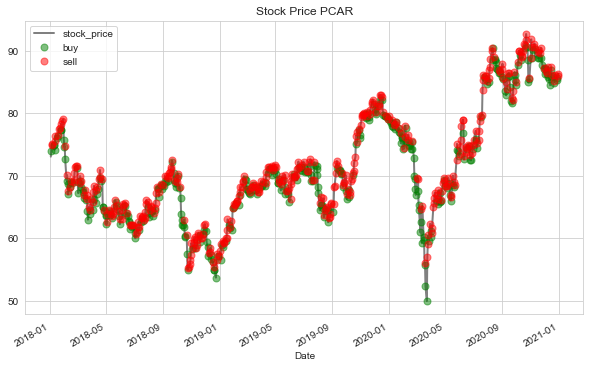

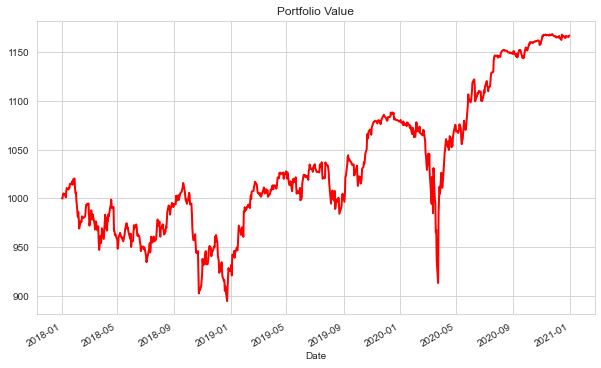

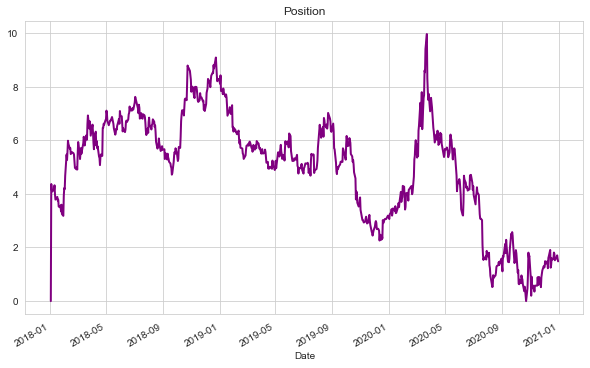

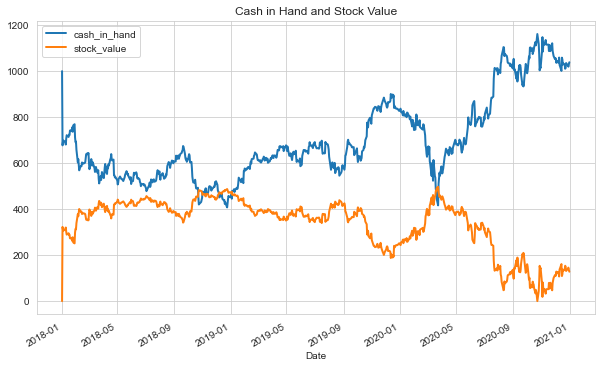

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: PCAR
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 5.27 %
Volatility: 0.1148
shape ratio: 0.3634
Maximun drawdown: -16.05 %
Calmar ratio: 0.3286
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 5.72 %
Volatility (benchmark): 0.2871
shape ratio: 0.1609
Maximun drawdown: -39.83 %
Calmar ratio (benchmark): 0.1436


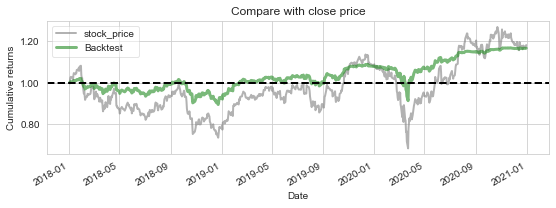

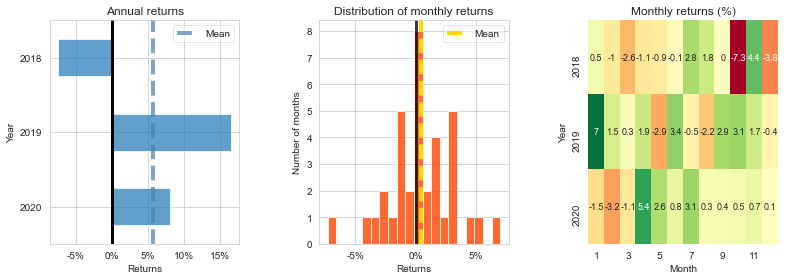

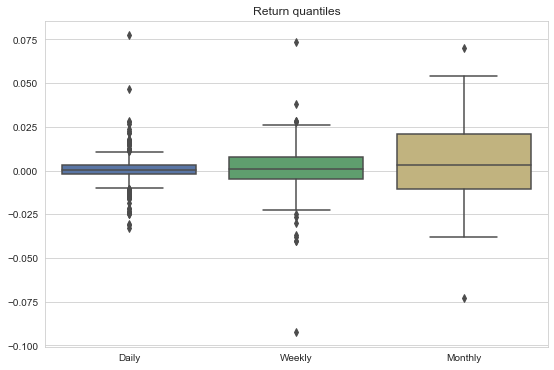

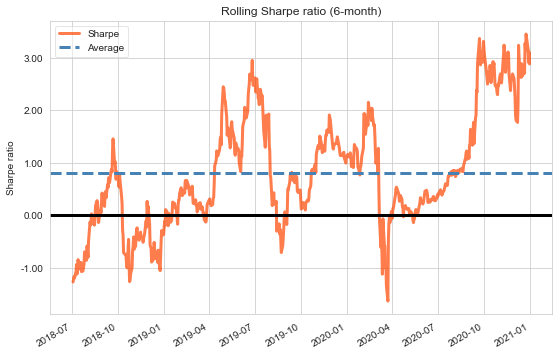

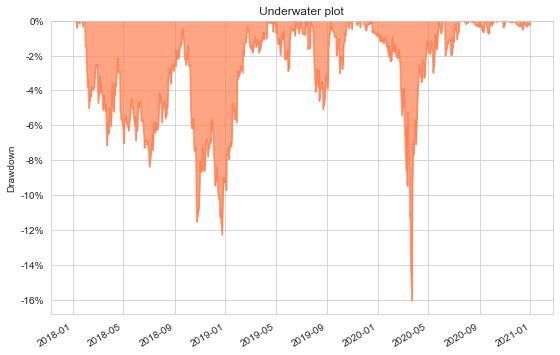

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')